<a href="https://colab.research.google.com/github/AdamTMU/CIND820/blob/main/Capstone_Project_CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Install necessary packages
!pip install ucimlrepo

# Import the necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [21]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
X['target'] = heart_disease.data.targets

In [16]:
# variable information
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [22]:
#Looking at first 10 rows of data
heart_disease.data.features.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1



Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
st

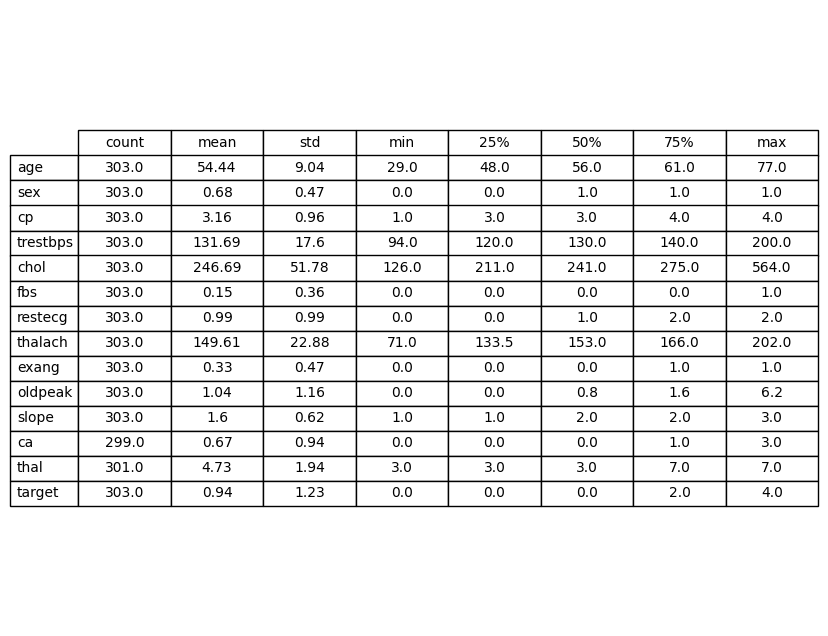

In [23]:
# Descriptive statistics for features
descriptive_stats = X.describe(include='all')
print("\nDescriptive Statistics:")
print(descriptive_stats)
#Round the numbers
descriptive_stats = descriptive_stats.round(2)
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))  # Increased figure size

# Create a table for descriptive statistics
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
plt.axis('tight')
plt.axis('off')
table_data = descriptive_stats.T  # Transpose for better display
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  rowLabels=table_data.index,
                  cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Increased scale for better visibility


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.362605  0.093185  0.233214  0.098773  0.119000  0.145478   
thal      0.127389  0.380936  0.265246  0.1

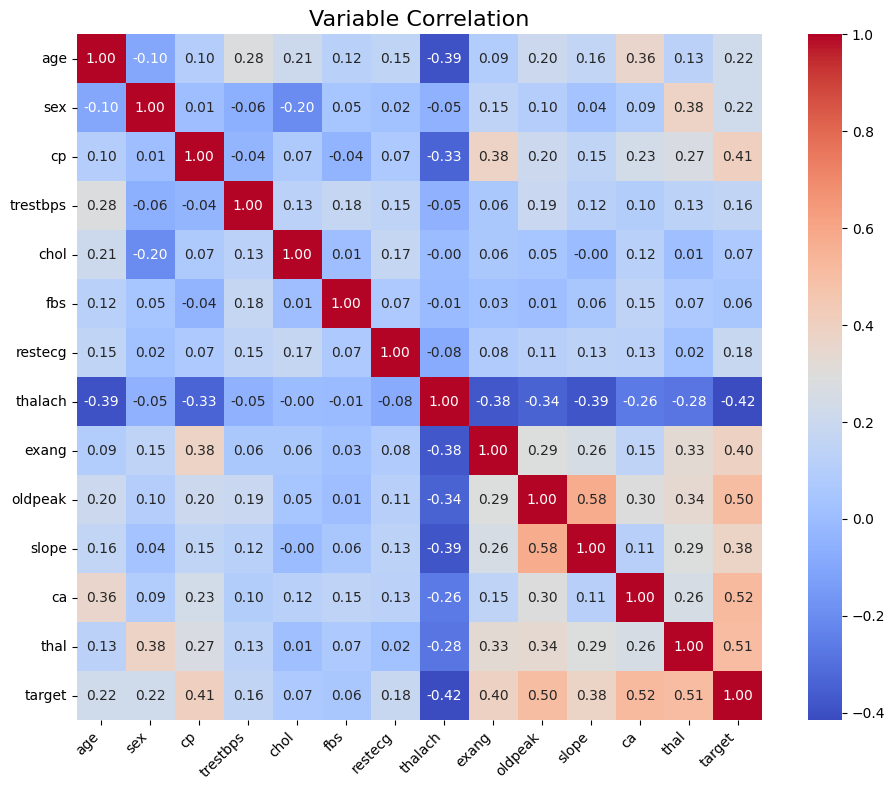

In [24]:
# Correlation matrix for features
correlation_matrix = X.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Title and labels
plt.title('Variable Correlation', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.yticks(rotation=0)  # Keep y labels horizontal

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Checking for missing values in features
missing_values = X.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Checking for missing values in target
missing_target = y.isnull().sum()
print("\nMissing values in the target variable:")
print(missing_target)


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Missing values in the target variable:
num    0
dtype: int64


In [ ]:
#Proportion of patient with and without heart disease
proportion = y.value_counts(normalize=True)
print("\nProportion of patients with and without heart disease:")
print(proportion)


Proportion of patients with and without heart disease:
num
0      0.541254
1      0.181518
2      0.118812
3      0.115512
4      0.042904
Name: proportion, dtype: float64


In [11]:
# Tentative methology flowchart
!pip install graphviz
from graphviz import Digraph
from graphviz import Digraph

# Create a new directed graph
flowchart = Digraph()

# Define the nodes with colors
flowchart.node('A', 'Data Collection: Heart Disease Dataset', style='filled', fillcolor='lightblue')
flowchart.node('B', 'Data Preprocessing', style='filled', fillcolor='lightblue')
flowchart.node('C', 'Significant Feature Selection', style='filled', fillcolor='lightblue')
flowchart.node('D', 'Model Selection: Training and Testing Sets', style='filled', fillcolor='lightblue')
flowchart.node('E', 'Model Training', style='filled', fillcolor='lightblue')
flowchart.node('F', 'Model Evaluation', style='filled', fillcolor='lightblue')
flowchart.node('G', 'Model Interpretation', style='filled', fillcolor='lightblue')
flowchart.node('H', 'Deployment:Key Findings', style='filled', fillcolor='lightblue')

# Define the edges (connections between nodes)
flowchart.edge('A', 'B')
flowchart.edge('B', 'C')
flowchart.edge('C', 'D')
flowchart.edge('D', 'E')
flowchart.edge('E', 'F')
flowchart.edge('F', 'G')
flowchart.edge('G', 'H')

# Render the flowchart to a file (e.g., PNG)
flowchart.render('colored_flowchart', format='png', cleanup=True)

'colored_flowchart.png'

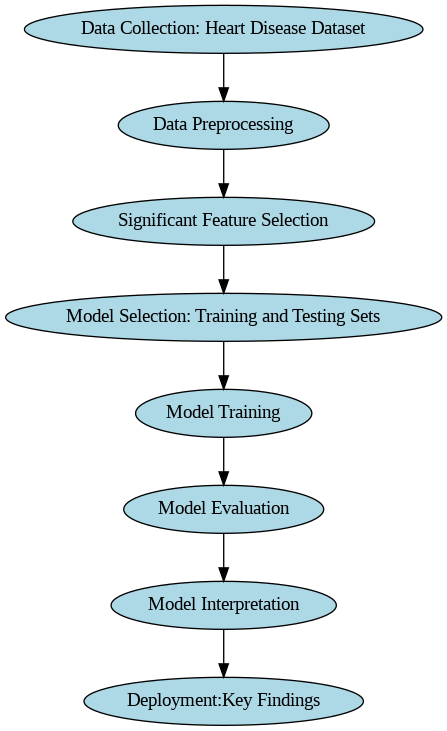

In [12]:
from IPython.display import Image

# Display the flowchart
Image('colored_flowchart.png')